# Importing important libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# The file spam.csv
## This file has encoding 'ISO-8859-1'
### Dropping the useless columns and renaming the columns
### The labels are maped usign following dictionary {'ham' : 0, 'spam' : 1}

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
df.columns = ['labels', 'message']
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df['labels'] = df['labels'].map({'ham' : 0, 'spam' : 1})
y = df['labels'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], y, test_size = 0.3)

# Text processing
## We select the maximum vocabulary size i.e. number of distinct words (tokens) as 20000
### The tokenizer object tokenizes each distinct word by providing a integer value to it by doing fit_on_texts
### These tokens (integers) are used to convert a sentence into a sequence (vector)

### The tokenizer.word_index gives the dictionary where the istinct word is key and assigned integer is value

In [6]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(X_train)
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

In [7]:
v = len(tokenizer.word_index)
print(f'{v} number of tokens found')

7429 number of tokens found


# Sequence processing
### Once the sequence is found , it's not always of same length hence we pad them with zeros 
### by default the 0's are added infront , we did it in train sequence
### In test_sequence we set the max length as the length of padded train sequence

In [8]:
train_sequence = pad_sequences(train_sequence)
test_sequence = pad_sequences(test_sequence, maxlen = train_sequence.shape[1])

# Model
### The input is the sequences
### the Embedding layer is very important since it converts these words into vectors which are interpretable i.e. similar words will have greater cosine similarity and vice-versa. The input if number of distinct words +1 and the output representation is 25 dimensional vector. This 25 dimensions is hyperparameter
### We will use Conv1D layer to find the pattern in 1 dimensional sequences.
### We have Conv1D layer followed by Mapooling1D layer having 32, 64 and 128 filters respectively. Each filter is 1x3 and activation is ReLU
### Just befor the Dense layer we apply GlobalMaxPooling1D layer
### The Dense layer has 1 neuron since this is binary classification with sigmoid activation

In [9]:
i = Input(shape = (train_sequence.shape[1],))
o = Embedding(v+1, 25)(i)
o = Conv1D(32, 3, activation = 'relu')(o)
o = MaxPooling1D(3)(o)
o = Conv1D(64, 3, activation = 'relu')(o)
o = MaxPooling1D(3)(o)
o = Conv1D(128, 3, activation = 'relu')(o)
o = GlobalMaxPooling1D()(o)
o = Dense(1, activation = 'sigmoid')(o)

model = Model(i, o)

# Compile and Fit
### We use ADAM as optimizer, binary crossentropy as loss function and accuracy as metric
### The model is trained for 10 epochs

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
r = model.fit(train_sequence, y_train, validation_data = (test_sequence, y_test), epochs = 10)

Epoch 1/10
122/122 [==============================] - 4s 11ms/step - loss: 0.4243 - accuracy: 0.8564 - val_loss: 0.3549 - val_accuracy: 0.8750
Epoch 2/10
122/122 [==============================] - 1s 7ms/step - loss: 0.2419 - accuracy: 0.9123 - val_loss: 0.0866 - val_accuracy: 0.9773
Epoch 3/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0573 - accuracy: 0.9838 - val_loss: 0.0792 - val_accuracy: 0.9821
Epoch 4/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0347 - accuracy: 0.9918 - val_loss: 0.0872 - val_accuracy: 0.9827
Epoch 5/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0279 - accuracy: 0.9946 - val_loss: 0.0920 - val_accuracy: 0.9827
Epoch 6/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0263 - accuracy: 0.9954 - val_loss: 0.0922 - val_accuracy: 0.9850
Epoch 7/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0247 - accuracy: 0.9954 - val_loss: 0.1009 - val_accuracy: 0.9827
Epoch

# History plotter function

###  This plots the history object with argument as 'loss' and 'accuracy'

In [12]:
def history_plotter(model, argument):
    plt.plot(model.history[argument], label = argument)
    plt.plot(model.history['val_'+argument], label = 'validation '+argument)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(argument)
    plt.title(argument)

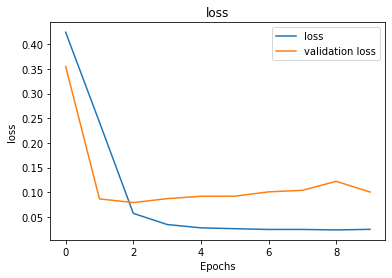

In [13]:
history_plotter(r, 'loss')

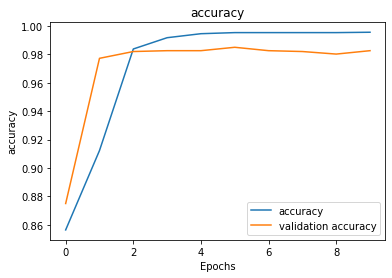

In [14]:
history_plotter(r, 'accuracy')